Aluno: Leonardo José Held, 17203984.

Nesse trabalho, vamos explorar os conceitos de sinais e filtragem, mais especificamente com sinais de voz. O sinal de voz utilizado foi gerado por computador, via o plano de estudante da https://www.naturalreaders.com. O texto falado é uma parte da música "Han-tyumi, the Confused Cyborg".

Os filtros abordados serão de esquecimento e média móvel, além de conceitos básicos de correlação de sinais. O código é em linguagem Python e a licença permissiva e aberta para todo o documento pode ser encontrada no final deste arquivo. Além disso, os códigos (interativos :-)!) e arquivos fonte podem ser encontrados em https://github.com/leonheld/explorations-into-dsp/tree/master/first-assignment.

In [ ]:
Incluindo algumas bibliotecas, comentários ao lado sobre o que cada uma faz

In [1]:
import wave # para lidar com arquivos WAVE
import numpy as np # arrays, só que mais rápidos e melhores
import scipy.signal as sps # para usar função correlação
import scipy.fftpack as fftp # para gerar um gráfico de espectro de frequência
import matplotlib.pyplot as plt # para gerar plots
import seaborn as sns# plots mais belos, afinal, estética é sempre bom
from IPython.display import Audio # para ter um player de aúdio inline, sem necessidade de um externo

import warnings
warnings.filterwarnings('ignore') # Ignorar os warnings faz o programador ser mais feliz

sns.set_theme()

Essa função separa os canais de aúdio. 
    Copyright Andriy Makukha sob a Creative Commons License

In [2]:
def save_wav_channel(fn, wav, channel):
    # Read data
    nch   = wav.getnchannels()
    depth = wav.getsampwidth()
    wav.setpos(0)
    sdata = wav.readframes(wav.getnframes())

    # Extract channel data (24-bit data not supported)
    typ = { 1: np.uint8, 2: np.uint16, 4: np.uint32 }.get(depth)
    if not typ:
        raise ValueError("sample width {} not supported".format(depth))
    if channel >= nch:
        raise ValueError("cannot extract channel {} out of {}".format(channel+1, nch))
    print ("Extracting channel {} out of {} channels, {}-bit depth".format(channel+1, nch, depth*8))
    data = np.fromstring(sdata, dtype=typ)
    ch_data = data[channel::nch]

    # Save channel to a separate file
    outwav = wave.open(fn, 'w')
    outwav.setparams(wav.getparams())
    outwav.setnchannels(1)
    outwav.writeframes(ch_data.tostring())
    outwav.close()

Trecho de código simples que abre o arquivo .wav e gera um numpy array normalizado Copyright Matthew Walker sob a Creative Commons License, com modificações

Extracting channel 1 out of 2 channels, 16-bit depth
Extracting channel 2 out of 2 channels, 16-bit depth


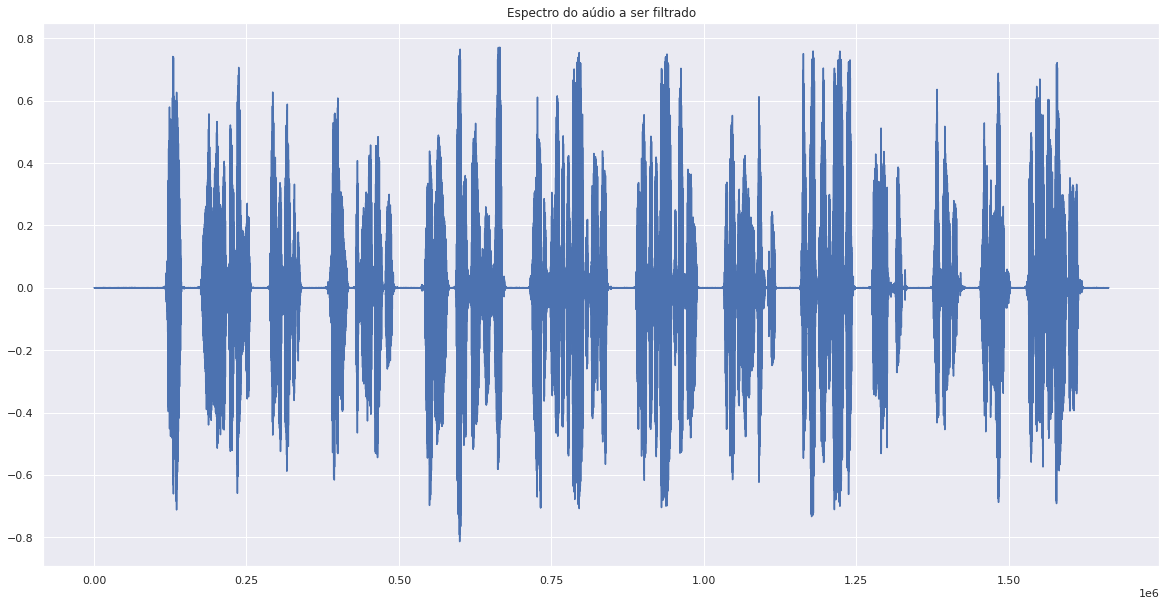

In [3]:
# Read file to get buffer                                                                                               
voiceSampleTwoChannels = wave.open("audioSample.wav")

# Extracting the channels using save_wav_channel() defined above
save_wav_channel('ch1.wav', voiceSampleTwoChannels, 0)
save_wav_channel('ch2.wav', voiceSampleTwoChannels, 1)

voiceSampleFirstChannel = wave.open("ch1.wav")
samples = voiceSampleFirstChannel.getnframes()
audio = voiceSampleFirstChannel.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio, dtype=np.int16)
audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(audio_normalised)
plt.title("Espectro do aúdio a ser filtrado")
plt.show()

E esse trecho de código será usado pra plots de espectro de frequência.

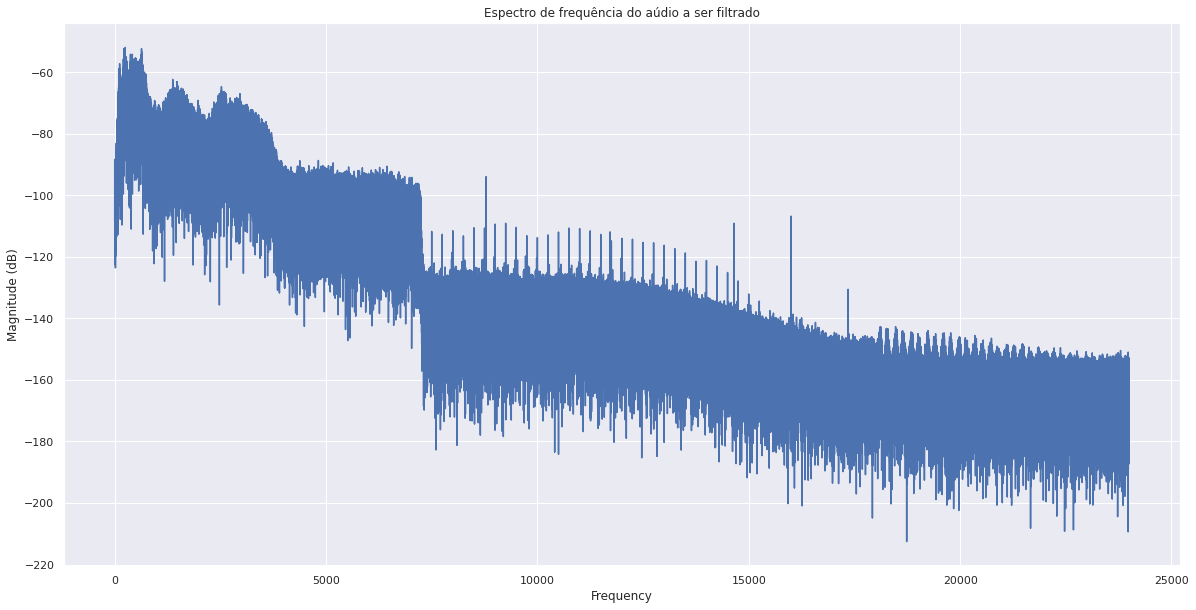

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.magnitude_spectrum(audio_normalised, scale='dB', Fs=48000)
plt.title("Espectro de frequência do aúdio a ser filtrado")
plt.show()